### Exploratory Data Analysis

### Install conda and rdkit

In [3]:
import sys
import pandas as pd
!pip install rdkit

In [4]:
df6 = pd.read_csv('P53_03_bioactivity_data_curated.csv')
df6

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL179549,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccc(C(C)(C)C)cc1)...,27000.00,inactive
1,CHEMBL360920,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccccc1)c1ccc(C(C)...,66000.00,inactive
2,CHEMBL182052,CCCOC1(c2ccccc2)c2ccccc2C(=O)N1C(Cc1ccc(O)cc1)...,90000.00,inactive
3,CHEMBL179662,OCC(NC1(c2ccccc2)c2ccccc2CC1Cc1ccccc1)C(O)c1cc...,85000.00,inactive
4,CHEMBL181688,CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2...,92000.00,inactive
...,...,...,...,...
1290,CHEMBL3649967,CCOC(c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c3)...,1.20,active
1291,CHEMBL5092438,COCC(C)c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c...,1.60,active
1292,CHEMBL5089893,CCO[C@@H](c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(C...,0.35,active
1293,CHEMBL5085142,Cc1cccc(-c2nc3nc(C(=O)O)nc(NCC4CC4)c3n2CC2CCCC...,8400.00,intermediate


In [5]:
df_no_smiles = df6.drop(columns='canonical_smiles')

In [6]:
smiles = []

for i in df6.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [7]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL179549,27000.00,inactive,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccc(C(C)(C)C)cc1)...
1,CHEMBL360920,66000.00,inactive,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccccc1)c1ccc(C(C)...
2,CHEMBL182052,90000.00,inactive,CCCOC1(c2ccccc2)c2ccccc2C(=O)N1C(Cc1ccc(O)cc1)...
3,CHEMBL179662,85000.00,inactive,OCC(NC1(c2ccccc2)c2ccccc2CC1Cc1ccccc1)C(O)c1cc...
4,CHEMBL181688,92000.00,inactive,CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2...
...,...,...,...,...
1290,CHEMBL3649967,1.20,active,CCOC(c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c3)...
1291,CHEMBL5092438,1.60,active,COCC(C)c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c...
1292,CHEMBL5089893,0.35,active,CCO[C@@H](c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(C...
1293,CHEMBL5085142,8400.00,intermediate,Cc1cccc(-c2nc3nc(C(=O)O)nc(NCC4CC4)c3n2CC2CCCC...


### Examining the SMILES data

In [8]:
df_clean_smiles.canonical_smiles

0       CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccc(C(C)(C)C)cc1)...
1       CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccccc1)c1ccc(C(C)...
2       CCCOC1(c2ccccc2)c2ccccc2C(=O)N1C(Cc1ccc(O)cc1)...
3       OCC(NC1(c2ccccc2)c2ccccc2CC1Cc1ccccc1)C(O)c1cc...
4       CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2...
                              ...                        
1290    CCOC(c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c3)...
1291    COCC(C)c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c...
1292    CCO[C@@H](c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(C...
1293    Cc1cccc(-c2nc3nc(C(=O)O)nc(NCC4CC4)c3n2CC2CCCC...
1294    C[C@@H](Nc1nc(C(=O)O)nc2nc(-c3ccc4sccc4c3)n(Cc...
Name: canonical_smiles, Length: 1295, dtype: object

### Convert a molecule from the SMILES string to an rdkit object

In [9]:
from rdkit import Chem

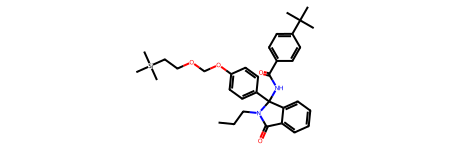

In [10]:
Chem.MolFromSmiles(df_clean_smiles.canonical_smiles[0])

### Calculate molecular descriptors in rdkit

### Convert list of molecules to rdkit object

In [11]:
from rdkit import Chem

In [12]:
mol_list= []
for element in df_clean_smiles.canonical_smiles:
  mol = Chem.MolFromSmiles(element)
  mol_list.append(mol)

In [13]:
len(mol_list)

1295

In [14]:
mol_list[:5]

### Calculate Lipinski descriptors

### Import libraries

In [15]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### Calculate descriptors

In [16]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [17]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,572.822,7.17210,1.0,4.0
1,426.560,5.48100,1.0,2.0
2,445.515,4.26000,1.0,5.0
3,449.594,5.02930,3.0,3.0
4,461.605,7.05800,0.0,2.0
...,...,...,...,...
1290,523.037,5.80390,1.0,8.0
1291,511.026,5.62720,1.0,8.0
1292,537.064,6.36490,1.0,8.0
1293,419.529,4.90212,2.0,6.0


#### Combine DataFrames

In [18]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,572.822,7.17210,1.0,4.0
1,426.560,5.48100,1.0,2.0
2,445.515,4.26000,1.0,5.0
3,449.594,5.02930,3.0,3.0
4,461.605,7.05800,0.0,2.0
...,...,...,...,...
1290,523.037,5.80390,1.0,8.0
1291,511.026,5.62720,1.0,8.0
1292,537.064,6.36490,1.0,8.0
1293,419.529,4.90212,2.0,6.0


In [19]:
df6

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL179549,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccc(C(C)(C)C)cc1)...,27000.00,inactive
1,CHEMBL360920,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccccc1)c1ccc(C(C)...,66000.00,inactive
2,CHEMBL182052,CCCOC1(c2ccccc2)c2ccccc2C(=O)N1C(Cc1ccc(O)cc1)...,90000.00,inactive
3,CHEMBL179662,OCC(NC1(c2ccccc2)c2ccccc2CC1Cc1ccccc1)C(O)c1cc...,85000.00,inactive
4,CHEMBL181688,CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2...,92000.00,inactive
...,...,...,...,...
1290,CHEMBL3649967,CCOC(c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c3)...,1.20,active
1291,CHEMBL5092438,COCC(C)c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c...,1.60,active
1292,CHEMBL5089893,CCO[C@@H](c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(C...,0.35,active
1293,CHEMBL5085142,Cc1cccc(-c2nc3nc(C(=O)O)nc(NCC4CC4)c3n2CC2CCCC...,8400.00,intermediate


In [20]:
df_combined = pd.concat([df6,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL179549,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccc(C(C)(C)C)cc1)...,27000.00,inactive,572.822,7.17210,1.0,4.0
1,CHEMBL360920,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccccc1)c1ccc(C(C)...,66000.00,inactive,426.560,5.48100,1.0,2.0
2,CHEMBL182052,CCCOC1(c2ccccc2)c2ccccc2C(=O)N1C(Cc1ccc(O)cc1)...,90000.00,inactive,445.515,4.26000,1.0,5.0
3,CHEMBL179662,OCC(NC1(c2ccccc2)c2ccccc2CC1Cc1ccccc1)C(O)c1cc...,85000.00,inactive,449.594,5.02930,3.0,3.0
4,CHEMBL181688,CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2...,92000.00,inactive,461.605,7.05800,0.0,2.0
...,...,...,...,...,...,...,...,...
1290,CHEMBL3649967,CCOC(c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c3)...,1.20,active,523.037,5.80390,1.0,8.0
1291,CHEMBL5092438,COCC(C)c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c...,1.60,active,511.026,5.62720,1.0,8.0
1292,CHEMBL5089893,CCO[C@@H](c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(C...,0.35,active,537.064,6.36490,1.0,8.0
1293,CHEMBL5085142,Cc1cccc(-c2nc3nc(C(=O)O)nc(NCC4CC4)c3n2CC2CCCC...,8400.00,intermediate,419.529,4.90212,2.0,6.0


### Convert IC50 to pIC50

In [21]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [22]:
df_combined.standard_value.describe()

count    1.295000e+03
mean     2.799230e+04
std      9.508121e+04
min      6.100000e-02
25%      1.681500e+00
50%      4.600000e+01
75%      2.080000e+03
max      1.018000e+06
Name: standard_value, dtype: float64

In [23]:
-np.log10( (10**-9)* 100000000 )

1.0

In [24]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [25]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [26]:
df_norm = norm_value(df_combined)
df_norm

C:\Users\tahi3002\AppData\Local\Temp\1\ipykernel_13156\3416609517.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL179549,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccc(C(C)(C)C)cc1)...,inactive,572.822,7.17210,1.0,4.0,27000.00
1,CHEMBL360920,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccccc1)c1ccc(C(C)...,inactive,426.560,5.48100,1.0,2.0,66000.00
2,CHEMBL182052,CCCOC1(c2ccccc2)c2ccccc2C(=O)N1C(Cc1ccc(O)cc1)...,inactive,445.515,4.26000,1.0,5.0,90000.00
3,CHEMBL179662,OCC(NC1(c2ccccc2)c2ccccc2CC1Cc1ccccc1)C(O)c1cc...,inactive,449.594,5.02930,3.0,3.0,85000.00
4,CHEMBL181688,CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2...,inactive,461.605,7.05800,0.0,2.0,92000.00
...,...,...,...,...,...,...,...,...
1290,CHEMBL3649967,CCOC(c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c3)...,active,523.037,5.80390,1.0,8.0,1.20
1291,CHEMBL5092438,COCC(C)c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c...,active,511.026,5.62720,1.0,8.0,1.60
1292,CHEMBL5089893,CCO[C@@H](c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(C...,active,537.064,6.36490,1.0,8.0,0.35
1293,CHEMBL5085142,Cc1cccc(-c2nc3nc(C(=O)O)nc(NCC4CC4)c3n2CC2CCCC...,intermediate,419.529,4.90212,2.0,6.0,8400.00


In [27]:
df_norm.standard_value_norm.describe()

count    1.295000e+03
mean     2.799230e+04
std      9.508121e+04
min      6.100000e-02
25%      1.681500e+00
50%      4.600000e+01
75%      2.080000e+03
max      1.018000e+06
Name: standard_value_norm, dtype: float64

In [28]:
df_final = pIC50(df_norm)
df_final

C:\Users\tahi3002\AppData\Local\Temp\1\ipykernel_13156\3442786292.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL179549,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccc(C(C)(C)C)cc1)...,inactive,572.822,7.17210,1.0,4.0,4.568636
1,CHEMBL360920,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccccc1)c1ccc(C(C)...,inactive,426.560,5.48100,1.0,2.0,4.180456
2,CHEMBL182052,CCCOC1(c2ccccc2)c2ccccc2C(=O)N1C(Cc1ccc(O)cc1)...,inactive,445.515,4.26000,1.0,5.0,4.045757
3,CHEMBL179662,OCC(NC1(c2ccccc2)c2ccccc2CC1Cc1ccccc1)C(O)c1cc...,inactive,449.594,5.02930,3.0,3.0,4.070581
4,CHEMBL181688,CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2...,inactive,461.605,7.05800,0.0,2.0,4.036212
...,...,...,...,...,...,...,...,...
1290,CHEMBL3649967,CCOC(c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c3)...,active,523.037,5.80390,1.0,8.0,8.920819
1291,CHEMBL5092438,COCC(C)c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c...,active,511.026,5.62720,1.0,8.0,8.795880
1292,CHEMBL5089893,CCO[C@@H](c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(C...,active,537.064,6.36490,1.0,8.0,9.455932
1293,CHEMBL5085142,Cc1cccc(-c2nc3nc(C(=O)O)nc(NCC4CC4)c3n2CC2CCCC...,intermediate,419.529,4.90212,2.0,6.0,5.075721


In [29]:
df_final.pIC50.describe()

count    1295.000000
mean        7.113841
std         1.922808
min         2.992252
25%         5.681937
50%         7.337242
75%         8.774306
max        10.214670
Name: pIC50, dtype: float64

In [30]:
df_final.to_csv('P53_04_bioactivity_data_3class_pIC50.csv')

### Removing the 'intermediate' bioactivity class

In [31]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL179549,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccc(C(C)(C)C)cc1)...,inactive,572.822,7.1721,1.0,4.0,4.568636
1,CHEMBL360920,CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccccc1)c1ccc(C(C)...,inactive,426.560,5.4810,1.0,2.0,4.180456
2,CHEMBL182052,CCCOC1(c2ccccc2)c2ccccc2C(=O)N1C(Cc1ccc(O)cc1)...,inactive,445.515,4.2600,1.0,5.0,4.045757
3,CHEMBL179662,OCC(NC1(c2ccccc2)c2ccccc2CC1Cc1ccccc1)C(O)c1cc...,inactive,449.594,5.0293,3.0,3.0,4.070581
4,CHEMBL181688,CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2...,inactive,461.605,7.0580,0.0,2.0,4.036212
...,...,...,...,...,...,...,...,...
1289,CHEMBL3649993,COCC(C)c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c...,active,496.999,5.0662,1.0,8.0,8.045757
1290,CHEMBL3649967,CCOC(c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c3)...,active,523.037,5.8039,1.0,8.0,8.920819
1291,CHEMBL5092438,COCC(C)c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c...,active,511.026,5.6272,1.0,8.0,8.795880
1292,CHEMBL5089893,CCO[C@@H](c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(C...,active,537.064,6.3649,1.0,8.0,9.455932


In [32]:
df_2class.to_csv('P53_05_bioactivity_data_2class_pIC50.csv')

### PCA Visualization
Compressing 5 dimensions to 2D

In [41]:
pca_dataset = df_2class.drop(['molecule_chembl_id','canonical_smiles','class'],axis = 1)
pca_dataset

,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,572.822,7.1721,1.0,4.0,4.568636
1,426.560,5.4810,1.0,2.0,4.180456
2,445.515,4.2600,1.0,5.0,4.045757
3,449.594,5.0293,3.0,3.0,4.070581
4,461.605,7.0580,0.0,2.0,4.036212
...,...,...,...,...,...
1289,496.999,5.0662,1.0,8.0,8.045757
1290,523.037,5.8039,1.0,8.0,8.920819
1291,511.026,5.6272,1.0,8.0,8.795880
1292,537.064,6.3649,1.0,8.0,9.455932


In [39]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
scaler.fit(pca_dataset)

StandardScaler()

In [43]:
scaled_data = scaler.transform(pca_dataset)

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=2)

In [46]:
pca.fit(scaled_data)

PCA(n_components=2)

In [47]:
x_pca = pca.transform(scaled_data)

In [48]:
scaled_data.shape

(1151, 5)

In [49]:
x_pca.shape

(1151, 2)

Text(0, 0.5, 'Second Principal Component')

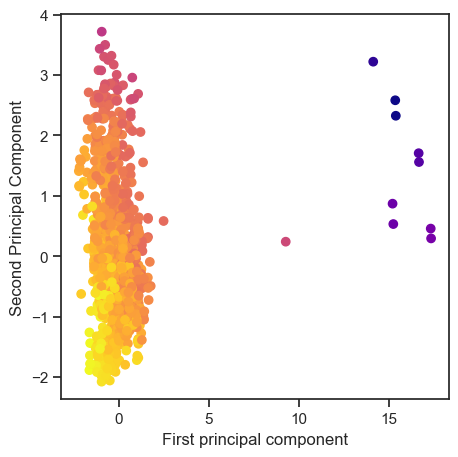

In [57]:
plt.figure(figsize=(5,5))
plt.scatter(x_pca[:,0],x_pca[:,1],c=pca_dataset['LogP'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

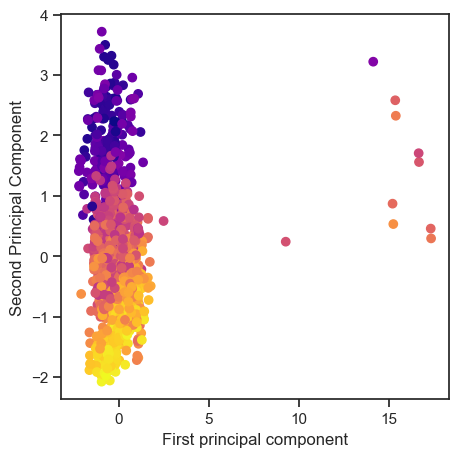

In [56]:
plt.figure(figsize=(5,5))
plt.scatter(x_pca[:,0],x_pca[:,1],c=pca_dataset['pIC50'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

#### Interpreting the components

In [62]:
pca.components_

array([[ 0.533714  , -0.38618424,  0.53056655,  0.52489302,  0.09485544],
       [-0.27324255, -0.53161246,  0.1484625 , -0.12272589, -0.77821844]])

### Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

#### Import library

In [51]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### Frequency plot of the 2 bioactivity classes

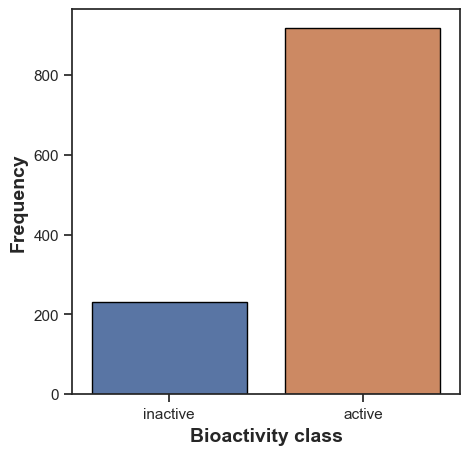

In [59]:
plt.figure(figsize=(5.0, 5.0))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### Scatter plot of MW versus LogP

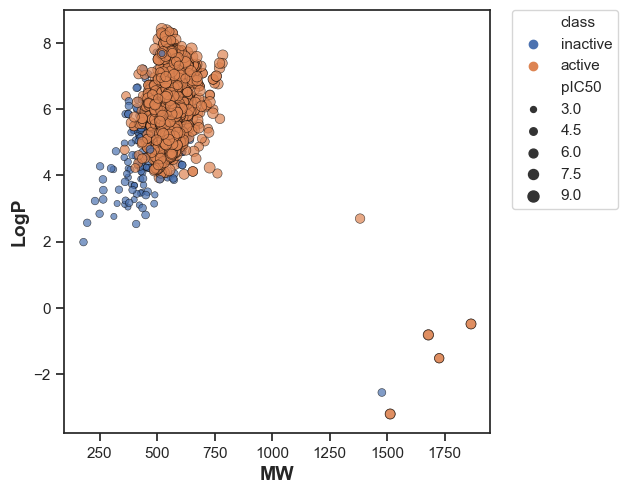

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### Box plots

#### pIC50 value

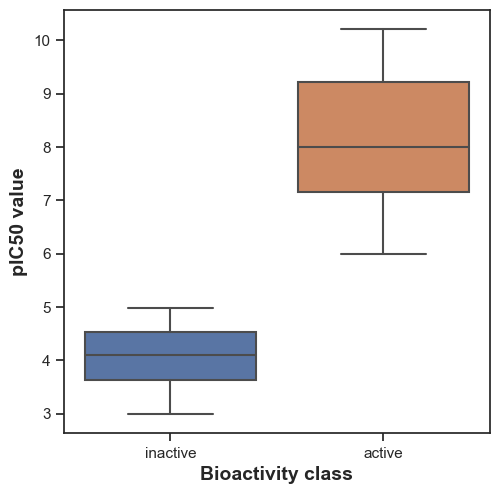

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

### MW

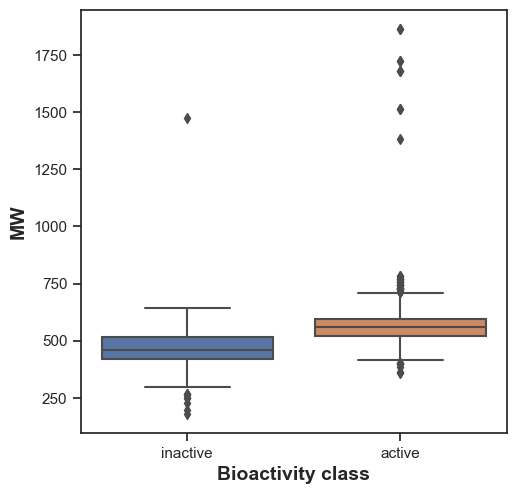

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

### LogP

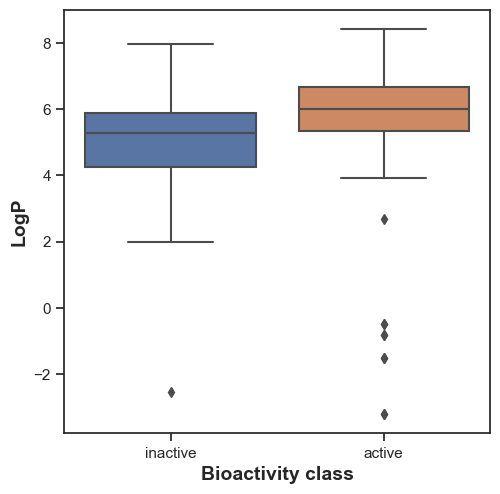

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

### NumHDonors

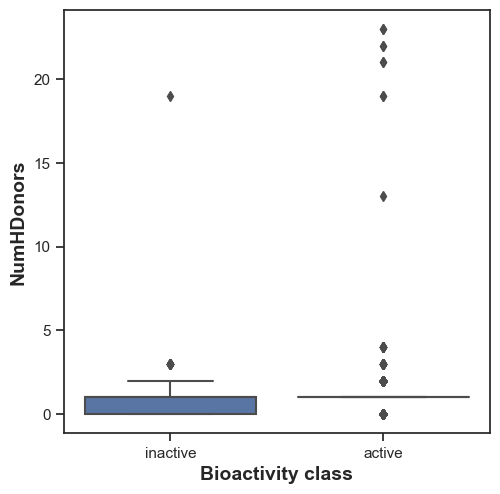

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')
     

### NumHAcceptors

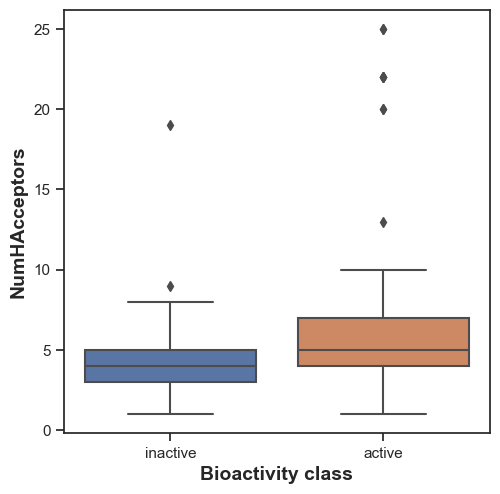

In [37]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [62]:
import subprocess
import zipfile

In [63]:
! zip -r results.zip . -i *.csv *.pdf

'zip' is not recognized as an internal or external command,
operable program or batch file.
